# Import Necessary Libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression


# Load the Data

In [41]:
df = pd.read_excel('/content/cleaned_bank_data_copy.xlsx')


# Data Inspection

In [45]:
print(df.head())


   age           job  marital  education  balance housing loan   contact  day  \
0   58    management  married   tertiary     2143     yes   no  cellular    5   
1   44    technician   single  secondary       29     yes   no  cellular    5   
2   33  entrepreneur  married  secondary        2     yes  yes  cellular    5   
3   47   blue-collar  married  secondary     1506     yes   no  cellular    5   
4   33   blue-collar   single  secondary        1      no   no  cellular    5   

  month  duration  
0   may       261  
1   may       151  
2   may        76  
3   may        92  
4   may       198  


# Get summary statistics


In [46]:
print(df.describe())


                age        balance           day      duration
count  41445.000000   41445.000000  41445.000000  41445.000000
mean      41.068500    1514.924744     15.748872    258.714344
std       10.738871    3133.829437      8.296515    258.172195
min       18.000000       0.000000      1.000000      0.000000
25%       33.000000     146.000000      8.000000    103.000000
50%       39.000000     542.000000     16.000000    180.000000
75%       49.000000    1596.000000     21.000000    320.000000
max       95.000000  102127.000000     31.000000   4918.000000


# Check the data types


In [47]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41445 entries, 0 to 41444
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41445 non-null  int64 
 1   job        41445 non-null  object
 2   marital    41445 non-null  object
 3   education  41445 non-null  object
 4   balance    41445 non-null  int64 
 5   housing    41445 non-null  object
 6   loan       41445 non-null  object
 7   contact    41445 non-null  object
 8   day        41445 non-null  int64 
 9   month      41445 non-null  object
 10  duration   41445 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 3.5+ MB
None


# Handle Missing Values

In [48]:
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
dtype: int64


# No missing Values

# Replace 'unknown' with NaN


In [49]:
df.replace('unknown', np.nan, inplace=True)


In [50]:
print("Missing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
dtype: int64


# Check for duplicates


In [51]:
print("Number of duplicates:", df.duplicated().sum())


Number of duplicates: 0


# Remove duplicates if they exist


In [52]:
df.drop_duplicates(inplace=True)


# Remove rows with negative balances

In [53]:
df = df[df['balance'] >= 0]


# Check for negative durations and handleit

In [54]:
df = df[df['duration'] >= 0]


# Drop unused Columns

In [13]:
columns_to_drop = ['pdays', 'campaign', 'previous', 'poutcome' , 'y']
# Add errors='ignore' to prevent the KeyError if a column is not found
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [14]:
print(df.head())


   age           job  marital  education  balance housing loan   contact  day  \
0   58    management  married   tertiary     2143     yes   no  cellular    5   
1   44    technician   single  secondary       29     yes   no  cellular    5   
2   33  entrepreneur  married  secondary        2     yes  yes  cellular    5   
3   47   blue-collar  married  secondary     1506     yes   no  cellular    5   
4   33   blue-collar   single  secondary        1      no   no  cellular    5   

  month  duration  
0   may       261  
1   may       151  
2   may        76  
3   may        92  
4   may       198  


# Create a Copy of the Cleaned DataFrame

In [15]:
cleaned_df_copy = df.copy()

In [16]:
print(cleaned_df_copy.head())

   age           job  marital  education  balance housing loan   contact  day  \
0   58    management  married   tertiary     2143     yes   no  cellular    5   
1   44    technician   single  secondary       29     yes   no  cellular    5   
2   33  entrepreneur  married  secondary        2     yes  yes  cellular    5   
3   47   blue-collar  married  secondary     1506     yes   no  cellular    5   
4   33   blue-collar   single  secondary        1      no   no  cellular    5   

  month  duration  
0   may       261  
1   may       151  
2   may        76  
3   may        92  
4   may       198  


In [36]:
cleaned_df_copy.to_excel('cleaned_bank_data_copy.xlsx', index=False)

# Visualize Data

# Analysis of Question 1: How does age correlate with account balance?

here is a positive trend indicating that older individuals tend to have higher account balances.
Younger clients generally have lower account balances, with most values clustered in the lower range.





# plot of Age vs Balance


<ipython-input-68-4f37c5a9b5a1>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_balance = df.groupby('age_group')['balance'].mean().reset_index()


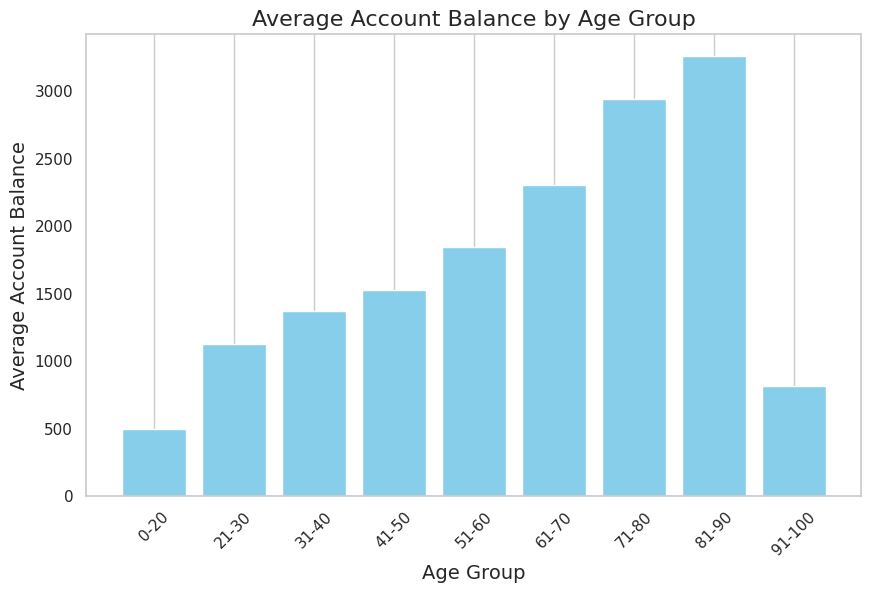

In [68]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate average balance for each age group
age_balance = df.groupby('age_group')['balance'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_balance['age_group'], age_balance['balance'], color='skyblue')
plt.title('Average Account Balance by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Account Balance', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Analysis Question 2: Is there a significant difference in balances between different job types?

Yes There Are a Difference

Management/Entrepreneurs tend to have significantly higher savings, reflecting higher earnings.

Students/Unemployed show minimal balances, indicating financial constraints.

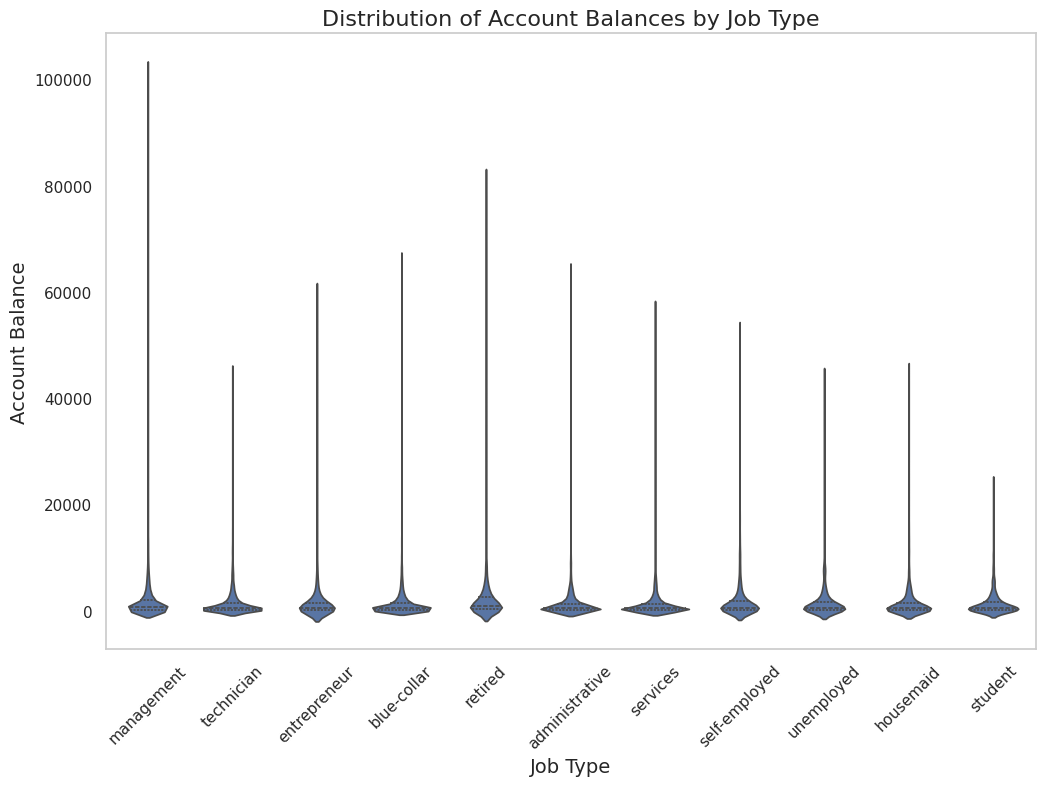

In [67]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Visualization: Violin plot for Balance by Job Type
plt.figure(figsize=(12, 8))
sns.violinplot(x='job', y='balance', data=df, inner='quartile')
plt.title('Distribution of Account Balances by Job Type', fontsize=16)
plt.xlabel('Job Type', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#Analysis Question 4 : Average Balance by Job Type

<ipython-input-76-5d147f24886c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='balance', y='job', data=average_balance.sort_values('balance', ascending=False), palette='viridis')


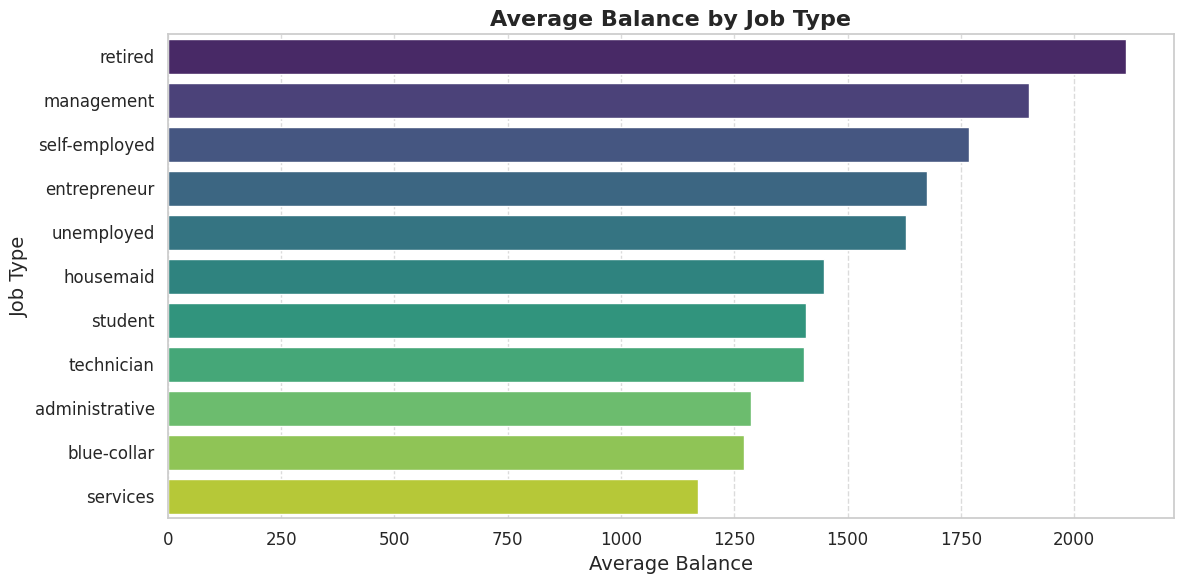

In [76]:
average_balance = df.groupby('job')['balance'].mean().reset_index()

# Create a bar chart for average balance by job type
plt.figure(figsize=(12, 6))
sns.barplot(x='balance', y='job', data=average_balance.sort_values('balance', ascending=False), palette='viridis')
plt.title('Average Balance by Job Type', fontsize=16, fontweight='bold')
plt.xlabel('Average Balance', fontsize=14)
plt.ylabel('Job Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Analysis Question 5 : Marital Status Distribution

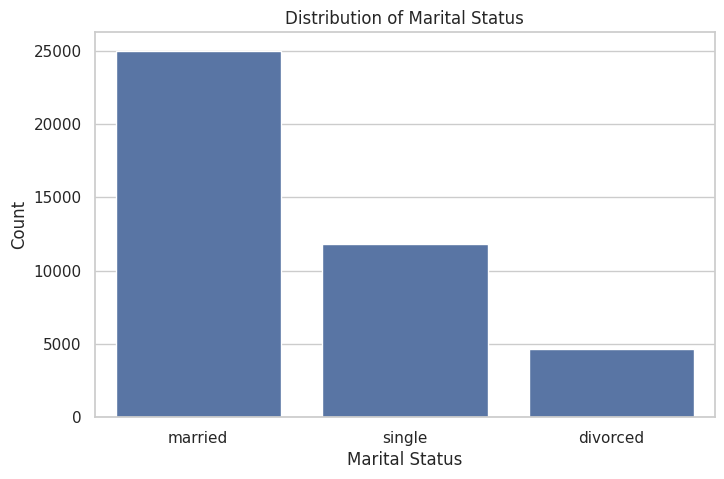

In [66]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='marital', order=df['marital'].value_counts().index)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

#Question 6 : What is the relationship between loan status and call duration?


There is no big differences to haveing A call affecting on your loan

<ipython-input-74-f1469051b577>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loan', y='duration', data=average_duration, palette='pastel')


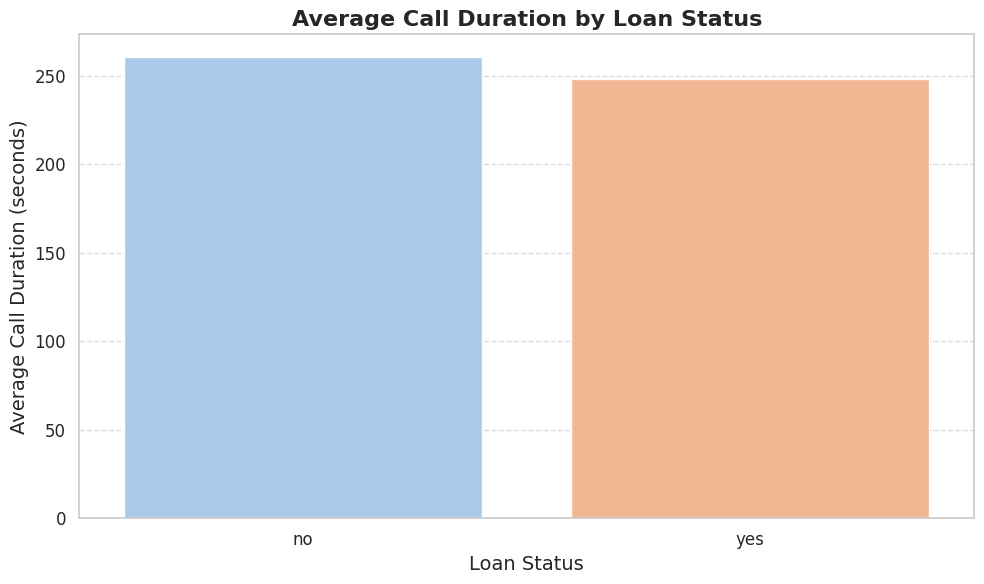

In [74]:
# Group by loan status and calculate the average call duration
average_duration = df.groupby('loan')['duration'].mean().reset_index()

# Create a bar chart for average call duration
plt.figure(figsize=(10, 6))
sns.barplot(x='loan', y='duration', data=average_duration, palette='pastel')
plt.title('Average Call Duration by Loan Status', fontsize=16, fontweight='bold')
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Average Call Duration (seconds)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Analysis Questin 7 : How does the education level impact the likelihood of having a higher balance?


Tertiary Education has the highest average account balance .

Secondary Education has a lower average balance .

Primary Education has the lowest average balance, appearing to be negative , which could indicate debt or overdrawn accounts.

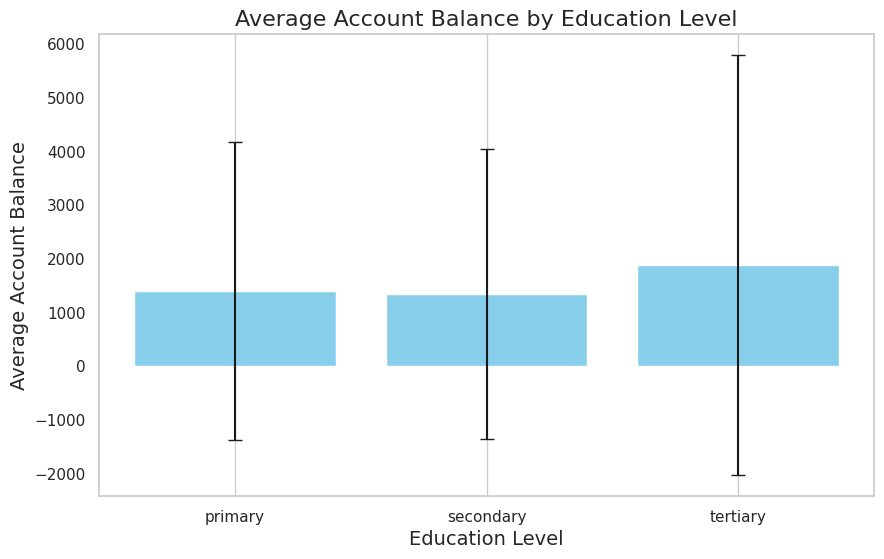

In [65]:
# Calculate average balance and its standard deviation for each education level
average_balance = df.groupby('education')['balance'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_balance['education'], average_balance['mean'], yerr=average_balance['std'], color='skyblue', capsize=5)
plt.title('Average Account Balance by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Average Account Balance', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

#Analysis Question 8 : What is the relationship between a client’s job type and the uptake of loans?


there's different job types are associated with loan statuses

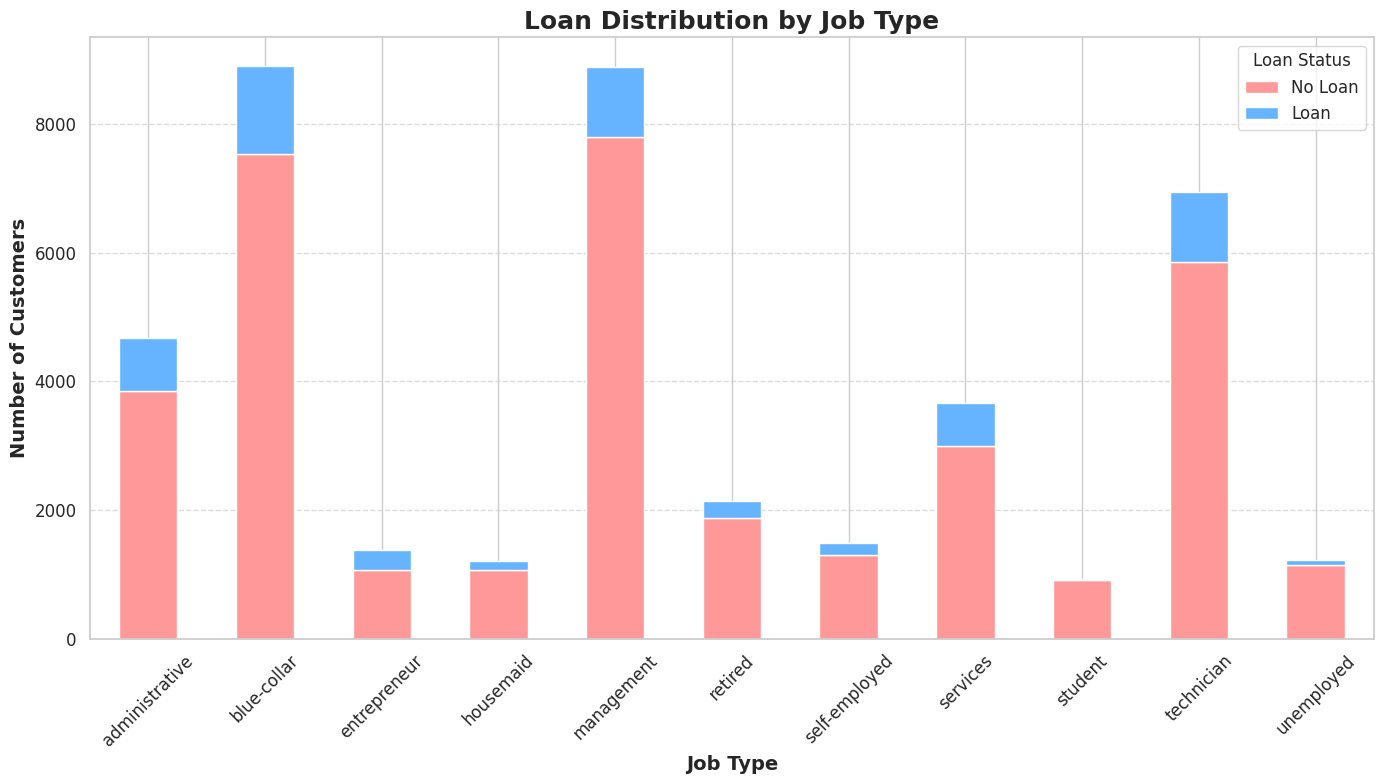

In [73]:
# Create the stacked bar chart
plt.figure(figsize=(14, 8))
colors = ['#ff9999', '#66b3ff']  # Color palette for the Loan Status
loan_distribution.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())

# Enhancing titles and labels
plt.title('Loan Distribution by Job Type', fontsize=18, fontweight='bold')
plt.xlabel('Job Type', fontsize=14, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)  # Increase font size of y-axis ticks
plt.legend(title='Loan Status', labels=['No Loan', 'Loan'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability

# Adjust layout for better fit
plt.tight_layout()
plt.show()